<a href="https://colab.research.google.com/github/MaresCDMX/rick-morty-Api/blob/main/Validaci%C3%B3n_Sharp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cargar archivo que se va a validar.

import pandas as pd

from google.colab import files
files.upload()

Saving Octubre 2021 Sharp.csv to Octubre 2021 Sharp (1).csv


{'Octubre 2021 Sharp.csv': b'\xef\xbb\xbfC\xc3\xb3digo,Fecha de registro,Fecha Asignado,Fecha Reasignado,Categor\xc3\xada,Descripci\xc3\xb3n,Numero inventario,Soluci\xc3\xb3n para el usuario,Estado,Notificado por,Area,Localizaci\xc3\xb3n,Tipo,Fecha de 1era Respuesta,Fecha firma soluci\xc3\xb3n,Fecha firma cierre,Anotacion\r\nREQ 2021-025236,29/10/21 21:34,29/10/21 21:34,,Configuraci\xc3\xb3n SHARP,"\n\n\n\n\n\n\n\n\n\n\nDe: VERONICA\nJACAL MURILLO <VJacalM@mail.scjn.gob.mx> \n\nEnviado el: viernes, 29 de octubre de 2021 11:37 a. m.\n\nPara: 1111 <1111@mail.scjn.gob.mx>\n\nCC: CARLOS MANUEL ROBLES MONDRAG\xc3\x93N <CMRobles@mail.scjn.gob.mx>\n\nAsunto: Creaci\xc3\xb3n de usuario y cuenta de correo institucional. entrega de\nequipo y VPN\n\nImportancia: Alta\n\n \n\nBuenos\nd\xc3\xadas, por este medio se solicita atentamente, lo siguiente:\n\n \n\n\n Creaci\xc3\xb3n de usuario y cuenta de correo institucional para JUAN\n     CARLOS RAMIREZ ORIZA, expediente 64375 (se adjunta formato)\n P

In [2]:
from datetime import datetime as dt
import numpy as np

Reporte_archivo = pd.read_csv('Octubre 2021 Sharp.csv')

df1 = pd.DataFrame(Reporte_archivo, columns = ['Código', 'Tipo','Fecha de registro','Fecha Asignado','Fecha Reasignado','Fecha de 1era Respuesta','Fecha firma solución'])

Reporte_archivo = pd.read_csv('Octubre 2021 Sharp.csv')

df1 = pd.DataFrame(Reporte_archivo, columns = ['Código', 'Tipo','Fecha de registro','Fecha Asignado','Fecha Reasignado','Fecha de 1era Respuesta','Fecha firma solución'])

pd.options.mode.chained_assignment = None  # default='warn'

df1['Fecha de 1era Respuesta'] = pd.to_datetime(df1['Fecha de 1era Respuesta'], dayfirst=True)
df1['Fecha Asignado'] = pd.to_datetime(df1['Fecha Asignado'], dayfirst=True)

df1['Dif. Días 1era Respuesta'] = df1.apply(lambda df1: (df1['Fecha de 1era Respuesta'] - df1['Fecha Asignado']),1)

holiday = ['2021-10-12','2021-11-01','2021-11-02','2021-11-15']

start = df1['Fecha de 1era Respuesta'].values.astype('datetime64[D]')
end = df1['Fecha Asignado'].values.astype('datetime64[D]')

# dias habiles solamente entre fecha Asignado y Fecha de 1era Respuesta
days =  np.busday_count(end,start,weekmask='Mon Tue Wed Thu Fri',holidays=holiday)

df1['Dif. Días 1R'] = days

df1['Dif. Días 1R'] = pd.to_timedelta(df1['Dif. Días 1R'], unit='d')

df1['Dif. Días 1era Respuesta'] = np.where(df1['Dif. Días 1era Respuesta'].astype('timedelta64[D]') > (df1['Dif. Días 1R'].dt.days), df1['Dif. Días 1era Respuesta'] - (df1['Dif. Días 1era Respuesta']-df1['Dif. Días 1R']), df1['Dif. Días 1era Respuesta'])

df1['Dif. Horas'] = df1['Dif. Días 1era Respuesta'].dt.total_seconds()/60

df1['Dif. Días'] = (df1['Dif. Días 1era Respuesta'] / np.timedelta64(1, 'D')).round()

conditionlist = [
    (df1['Dif. Días'] < 2) & (df1['Dif. Horas'] < 120),
    (df1['Dif. Días'] >= 2) & (df1['Dif. Horas'] > 120),
    (df1['Dif. Días'] < 2) & (df1['Dif. Horas'] > 120),
    (df1['Dif. Días'] >= 2) & (df1['Dif. Horas'] < 120)]
choicelist = ['NO', 'SI','SI','SI']

df1['Sobrepaso 1er SLA'] = np.select(conditionlist, choicelist, default='Not Specified')

in_SCJ = df1['Tipo'] == 'SCJ'

df2 = df1[in_SCJ]

pd.options.mode.chained_assignment = None  # default='warn'

df2['Fecha firma solución'] = pd.to_datetime(df2['Fecha firma solución'], dayfirst=True)
df2['Fecha Asignado'] = pd.to_datetime(df2['Fecha Asignado'], dayfirst=True)

df2['Dif. Días 2da Respuesta'] = df2.apply(lambda df2: (df2['Fecha firma solución'] - df2['Fecha Asignado']),1)

holiday = ['2021-10-12','2021-11-01','2021-11-02','2021-11-15']

start_scjn = df2['Fecha firma solución'].values.astype('datetime64[D]')
end_scjn = df2['Fecha Asignado'].values.astype('datetime64[D]')

# dias habiles solamente entre fecha Asignado y Fecha de 1era Respuesta
days_scjn =  np.busday_count(end_scjn,start_scjn,weekmask='Mon Tue Wed Thu Fri',holidays=holiday)

df2['Dif. Días 2R'] = days_scjn

df2['Dif. Días 2R'] = pd.to_timedelta(df2['Dif. Días 2R'], unit='d')

df2['Dif. Días 2da Respuesta'] = np.where(df2['Dif. Días 2da Respuesta'].astype('timedelta64[D]') > (df2['Dif. Días 2R'].dt.days), df2['Dif. Días 2da Respuesta'] - (df2['Dif. Días 2da Respuesta']-df2['Dif. Días 2R']), df2['Dif. Días 2da Respuesta'])

df2['Dif. Horas 2da'] = df2['Dif. Días 2da Respuesta'].dt.total_seconds()/60

df2['Dif. Días 2da'] = (df2['Dif. Días 2da Respuesta'] / np.timedelta64(1, 'D')).round()

conditionlist = [
    (df2['Dif. Días 2da'] < 2) & (df2['Dif. Horas 2da'] < 480),
    (df2['Dif. Días 2da'] >= 2) & (df2['Dif. Horas 2da'] > 480),
    (df2['Dif. Días 2da'] < 2) & (df2['Dif. Horas 2da'] > 480),
    (df2['Dif. Días 2da'] >= 2) & (df2['Dif. Horas 2da'] < 480)]
choicelist = ['NO', 'SI','SI','SI']

df2['Sobrepaso 2do SLA'] = np.select(conditionlist, choicelist, default='Not Specified')

in_CCJ = df1['Tipo'] == 'CCJ'

df3 = df1[in_CCJ]

pd.options.mode.chained_assignment = None  # default='warn'

df3['Fecha firma solución'] = pd.to_datetime(df3['Fecha firma solución'], dayfirst=True)
df3['Fecha Asignado'] = pd.to_datetime(df3['Fecha Asignado'], dayfirst=True)

df3['Dif. Días 2da Respuesta'] = df3.apply(lambda df3: (df3['Fecha firma solución'] - df3['Fecha Asignado']),1)

holiday = ['2021-10-12','2021-11-01','2021-11-02','2021-11-15']

start_ccj = df3['Fecha firma solución'].values.astype('datetime64[D]')
end_ccj = df3['Fecha Asignado'].values.astype('datetime64[D]')

# dias habiles solamente entre fecha Asignado y Fecha de 1era Respuesta
days_ccj =  np.busday_count(end_ccj,start_ccj,weekmask='Mon Tue Wed Thu Fri',holidays=holiday)

df3['Dif. Días 2R'] = days_ccj

df3['Dif. Días 2R'] = pd.to_timedelta(df3['Dif. Días 2R'], unit='d')

df3['Dif. Días 2da Respuesta'] = np.where(df3['Dif. Días 2da Respuesta'].astype('timedelta64[D]') > (df3['Dif. Días 2R'].dt.days), df3['Dif. Días 2da Respuesta'] - (df3['Dif. Días 2da Respuesta']-df3['Dif. Días 2R']), df3['Dif. Días 2da Respuesta'])

df3['Dif. Horas 2da'] = df3['Dif. Días 2da Respuesta'].dt.total_seconds()/60

df3['Dif. Días 2da'] = (df3['Dif. Días 2da Respuesta'] / np.timedelta64(1, 'D')).round()

conditionlist = [
    (df3['Dif. Días 2da'] < 2) & (df3['Dif. Horas 2da'] < 960),
    (df3['Dif. Días 2da'] >= 2) & (df3['Dif. Horas 2da'] > 960),
    (df3['Dif. Días 2da'] < 2) & (df3['Dif. Horas 2da'] > 960),
    (df3['Dif. Días 2da'] >= 2) & (df3['Dif. Horas 2da'] < 960)]
choicelist = ['NO', 'SI','SI','SI']

df3['Sobrepaso 2do SLA'] = np.select(conditionlist, choicelist, default='Not Specified')

df_result = pd.merge(df2, df3, how = 'outer')

df_result = df_result.drop(['Dif. Días 1era Respuesta', 'Dif. Días 1R', 'Dif. Días 2da Respuesta','Dif. Días 2R'], axis = 'columns')

df_result

df_result.to_excel('Reporte Validación Sharp.xlsx', index=False)

files.download('Reporte Validación Sharp.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Sobrepaso 1er SLA  Tipo
NO                 CCJ       2
                   SCJ     156
SI                 CCJ      16
                   SCJ     108
dtype: int64
282
Sobrepaso 1er SLA  Tipo
NO                 CCJ      0.709220
                   SCJ     55.319149
SI                 CCJ      5.673759
                   SCJ     38.297872
dtype: float64


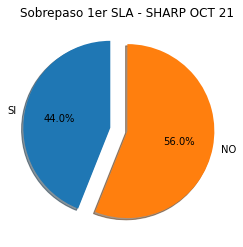

Sobrepaso 2do SLA  Tipo
NO                 CCJ       4
                   SCJ     229
SI                 CCJ      14
                   SCJ      35
dtype: int64
282
Sobrepaso 2do SLA  Tipo
NO                 CCJ      1.418440
                   SCJ     81.205674
SI                 CCJ      4.964539
                   SCJ     12.411348
dtype: float64


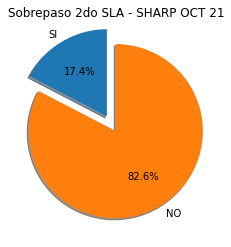

In [3]:
# Graficas

import matplotlib.pyplot as plt

print(df_result.groupby(['Sobrepaso 1er SLA','Tipo']).size())

print(df_result['Sobrepaso 1er SLA'].count())

print((df_result.groupby(['Sobrepaso 1er SLA','Tipo']).size()/df_result['Sobrepaso 1er SLA'].count())*100)

df_result['Porcentajes'] = (df_result.groupby('Sobrepaso 1er SLA').size()/df_result['Sobrepaso 1er SLA'].count())*100
df_result

Si_No = (df_result.groupby('Sobrepaso 1er SLA').size()/df_result['Sobrepaso 1er SLA'].count())*100
respuestas = [Si_No.SI,Si_No.NO]
tipo = ['SI','NO']
explode = [0.2, 0]  # Destacar algunos
plt.pie(respuestas, labels=tipo, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Sobrepaso 1er SLA - SHARP OCT 21')
plt.show()

print(df_result.groupby(['Sobrepaso 2do SLA','Tipo']).size())

print(df_result['Sobrepaso 2do SLA'].count())

print((df_result.groupby(['Sobrepaso 2do SLA','Tipo']).size()/df_result['Sobrepaso 2do SLA'].count())*100)

df_result['Porcentajes'] = (df_result.groupby('Sobrepaso 2do SLA').size()/df_result['Sobrepaso 1er SLA'].count())*100
df_result

Si_No = (df_result.groupby('Sobrepaso 2do SLA').size()/df_result['Sobrepaso 2do SLA'].count())*100
respuestas = [Si_No.SI,Si_No.NO]
tipo = ['SI','NO']
explode = [0.2, 0]  # Destacar algunos
plt.pie(respuestas, labels=tipo, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Sobrepaso 2do SLA - SHARP OCT 21')
plt.show()